# Aprendizaje Supervisado

In [14]:
#Importaciones iniciales
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

## Lectura de Datos

Como ya se quitó la estacionalidad en tareas anteriores, ya leemos directamente esos datos.

In [15]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Selección de columnas
datosGeneracion_sel = datosGeneracion[['Generacion_diff', 'NumSemana', 'NumDiaAnio', 'Hora', 'CoberturaNubes',
                                        'CodDirViento', 'CodCondCielo', 'HumedadRelativa_diff']]
datosGeneracion_sel.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,CoberturaNubes,CodDirViento,CodCondCielo,HumedadRelativa_diff
0,NaN,27,180,144600,70,4,4,NaN
1,NaN,27,180,144601,70,4,2,NaN
2,NaN,27,180,144602,70,4,2,NaN
3,NaN,27,180,144603,70,4,2,NaN


In [17]:
#Eliminamos filas vacias (las primeras 24, por el ejercicio de diferenciación)
datosGeneracion_dropna = datosGeneracion_sel.dropna()
datosGeneracion_dropna.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,CoberturaNubes,CodDirViento,CodCondCielo,HumedadRelativa_diff
24,0.0,27,181,144624,70,4,4,1.0
25,0.0,27,181,144625,70,4,4,0.0
26,0.0,27,181,144626,70,4,2,2.0
27,0.0,27,181,144627,70,4,2,1.0


In [18]:
#Normalizamos los datos con el MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_dropna)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_dropna.columns, index = datosGeneracion_dropna.index)
datosGeneracion_scaled_r = datosGeneracion_scaled.round(4)
datosGeneracion_scaled_r.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,CoberturaNubes,CodDirViento,CodCondCielo,HumedadRelativa_diff
24,0.5002,0.5,0.5028,0.0000,0.7,0.375,0.75,0.500
25,0.5002,0.5,0.5028,0.0001,0.7,0.375,0.75,0.494
26,0.5002,0.5,0.5028,0.0001,0.7,0.375,0.25,0.506
27,0.5002,0.5,0.5028,0.0002,0.7,0.375,0.25,0.500


In [6]:
#Imprimimos en formato latex para mostrarlo en el artículo
print(datosGeneracion_scaled_r.iloc[0:4,].to_latex(index = False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
Generacion_diff & NumSemana & NumDiaAnio & Hora & ProbabilidadLluvia_diff & CoberturaNubes & CodDirViento & DPT_diff & VelocidadViento_diff & Temperatura_diff & IndiceUV_diff & CodCondCielo \\
\midrule
0.500200 & 0.500000 & 0.502800 & 0.000000 & 0.528000 & 0.700000 & 0.375000 & 0.507200 & 0.559000 & 0.447400 & 0.444400 & 0.750000 \\
0.500200 & 0.500000 & 0.502800 & 0.000100 & 0.552800 & 0.700000 & 0.375000 & 0.507200 & 0.584200 & 0.473700 & 0.444400 & 0.750000 \\
0.500200 & 0.500000 & 0.502800 & 0.000100 & 0.534200 & 0.700000 & 0.375000 & 0.507200 & 0.559000 & 0.473700 & 0.444400 & 0.250000 \\
0.500200 & 0.500000 & 0.502800 & 0.000200 & 0.503100 & 0.700000 & 0.375000 & 0.492800 & 0.584200 & 0.447400 & 0.444400 & 0.250000 \\
\bottomrule
\end{tabular}



## Entrenamiento para elegir mejor modelo

In [43]:
#Importaciones de todos los modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, LogisticRegression
import xgboost
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

In [467]:
def fit(x, y, reg_model = 'RF', n_components = 3, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'LassoReg':
            model = Lasso(alpha = 0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha = 0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'XGBoost':
            model = xgboost.XGBRegressor(n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [9]:
#Librerías de las métricas
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [387]:
y = datosGeneracion_scaled[['Generacion_diff']]
x = datosGeneracion_scaled[['NumSemana', 'NumDiaAnio', 'Hora', 'CoberturaNubes',
                                        'CodDirViento', 'CodCondCielo', 'HumedadRelativa_diff']]

In [388]:
#Datos de Entrenamiento
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
TimeSeriesSplit(gap=0,max_train_size=None, n_splits=5, test_size=None)
for i, (train_index, test_index) in enumerate(tscv.split(x)):
    print(f"Fold {i}:")
    print(f" Train: index={train_index}")
    print(f" Test: index={test_index}")

Fold 0:
 Train: index=[   0    1    2 ... 3154 3155 3156]
 Test: index=[3157 3158 3159 ... 6307 6308 6309]
Fold 1:
 Train: index=[   0    1    2 ... 6307 6308 6309]
 Test: index=[6310 6311 6312 ... 9460 9461 9462]
Fold 2:
 Train: index=[   0    1    2 ... 9460 9461 9462]
 Test: index=[ 9463  9464  9465 ... 12613 12614 12615]
Fold 3:
 Train: index=[    0     1     2 ... 12613 12614 12615]
 Test: index=[12616 12617 12618 ... 15766 15767 15768]
Fold 4:
 Train: index=[    0     1     2 ... 15766 15767 15768]
 Test: index=[15769 15770 15771 ... 18919 18920 18921]


In [186]:
#Datos de Entrenamiento
#Procesamos los modelos
from tqdm import tqdm
import multiprocessing
from timeit import default_timer as timer

models_ed = ['AdaBoost', 'Boosting', 'DecisionTree', 'LassoReg', 'PCR',
                      'Bagging', 'RF', 'LinearReg', 'BayesRidge', 'RidgeReg', 'PLS', 'XGBoost']
n_jobs = multiprocessing.cpu_count()
results_ed = {
        'model' : [],
        'mse' : [],
        'rmse' : [],
        'mae' : [],
        'r2' : [],
        'mape' : [],
        'time' : [],
        'i': [],
        'train': [],
        'test': []
}

for k in tqdm(range(30)):
    for i, (train_index, test_index) in enumerate(tscv.split(x)):
        y_train = y.loc[24:len(train_index),]
        x_train = x.loc[24:len(train_index),]

        y_test = y.loc[test_index]
        x_test = x.loc[test_index]    
    
        for m in models_ed:
                start = timer()
                model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                end = timer()
                y_pred = model.predict(x_test)
                results_ed['model'].append(m)
                results_ed['mse'].append(mse(y_test, y_pred))
                results_ed['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                results_ed['mae'].append(mae(y_test, y_pred))
                results_ed['r2'].append(r2(y_test, y_pred))
                results_ed['mape'].append(mape(y_test, y_pred))
                results_ed['i'].append(i)
                results_ed['train'].append(len(train_index))
                results_ed['test'].append(len(test_index))
                results_ed['time'].append(end - start)

df_results_ed = pd.DataFrame(results_ed)
df_results_ed.to_csv('./Resultados_modelos_PCA2.csv')

100%|██████████| 30/30 [21:32<00:00, 43.08s/it]


## RMSE

In [79]:
df_results_ed = pd.read_csv('./Resultados_modelos_PCA.csv', index_col = 0)

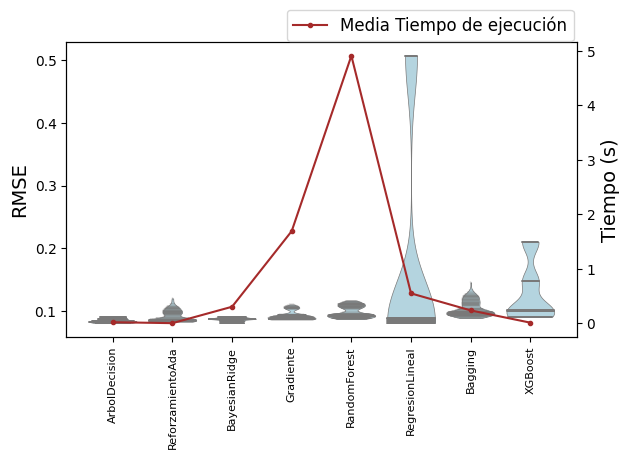

In [86]:
filter = df_results_ed["i"]==0
ff_results_ed = df_results_ed.where(filter).sort_values('rmse')
gp_results_ed = ff_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('rmse')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="rmse", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## MAE

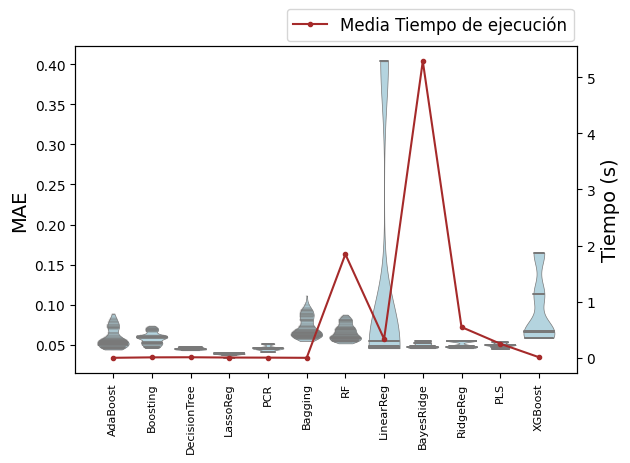

In [409]:
filter = df_results_ed["i"]==3
ff_results_ed = df_results_ed.sort_values('mae')
gp_results_ed = ff_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mae')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mae", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## R2

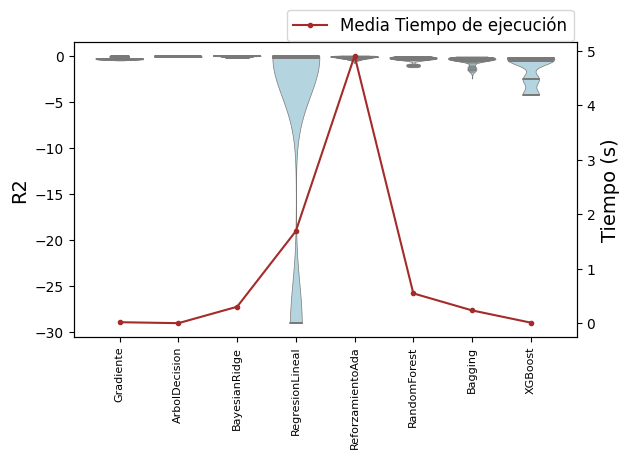

In [48]:
df_results_ed = df_results_ed.sort_values('r2', ascending=False)
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('r2', ascending=False)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="r2", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('R2', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

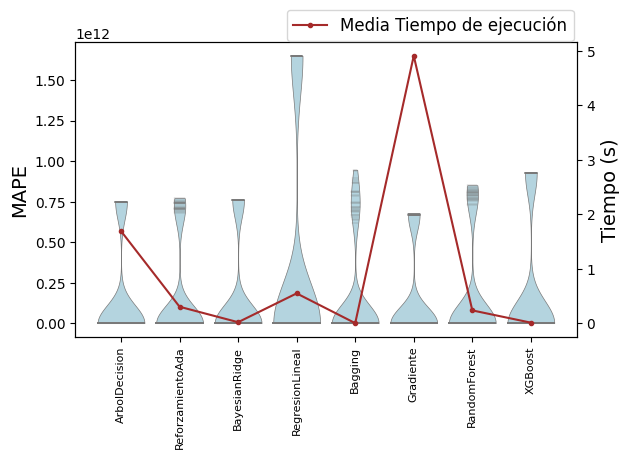

In [49]:
df_results_ed = df_results_ed.sort_values('mape')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## Método Random Forest

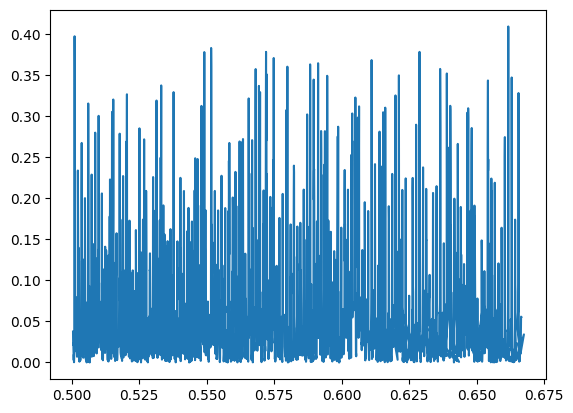

In [1098]:
i = 2
#modelRF = DecisionTreeRegressor(max_depth=2, max_features='log2', min_samples_leaf=4, min_samples_split=5)
#modelRF = Lasso(alpha=0.001)
modelRF = BayesianRidge(alpha_1= 1e-06, alpha_2= 0.0001, lambda_1= 0.0001, lambda_2= 1e-06)
inicio_train = 24
if i == 0:
    fin_train = 3156
    inicio_test =  3157
    fin_test = 6309
elif i == 1:
    fin_train = 6309
    inicio_test =  6310
    fin_test = 9462
elif i == 2:
    fin_train = 9462
    inicio_test =  9463
    fin_test = 12615
elif i == 3:
    fin_train = 12615
    inicio_test =  12616
    fin_test = 15768
elif i == 4:
    fin_train = 15768
    inicio_test =  15769
    fin_test = 18921

y_train = y.loc[inicio_train:fin_train,]
x_train = x.loc[inicio_train:fin_train,]

y_test = y.loc[inicio_test:fin_test,]
x_test = x.loc[inicio_test:fin_test,]
modelRF.fit(x_train, y_train)
y_pred_RF = modelRF.predict(x_test)
plt.plot(x_test["Hora"], abs(y_test["Generacion_diff"]- y_pred_RF))


In [1099]:
df_y_pred = pd.DataFrame(y_pred_RF, index = y_test.index, columns = ['Generacion_diff'])
df_y_pred

,Generacion_diff
9463,0.462553
9464,0.478987
9465,0.476835
9466,0.482740
9467,0.494556
...,...
12611,0.525930
12612,0.542802
12613,0.555965
12614,0.555723


In [1100]:
#Indicamos las filas que han sido predecidas por el método Bagging
datosGeneracion['predecida'] = 0
datosGeneracion.loc[df_y_pred.index, 'predecida'] = 1

In [1101]:
#Igualamos la predición con la generación
datosGeneracion['prediccion_diff'] = datosGeneracion_scaled['Generacion_diff']

In [1102]:
#Asignamos los datos de predicción a la columna
datosGeneracion.loc[df_y_pred.index, 'prediccion_diff'] = df_y_pred['Generacion_diff']

In [1103]:
#Obtenemos el máximo y el mínimo para desecalar
max_value = datosGeneracion_dropna["Generacion_diff"].max()
min_value = datosGeneracion_dropna["Generacion_diff"].min()

In [1104]:
#Desescalamos
datosGeneracion["Prediction"] = round((datosGeneracion["prediccion_diff"] * (max_value - min_value)) + min_value, 2)

In [1105]:
#Inicializamos la columna de predicción final con 0
datosGeneracion['Prediction_final'] = 0

In [1106]:
#Pasamos los primeros 24 registros de la generación original a las columnas predictivas
datosGeneracion.loc[0:24, 'Prediction'] = datosGeneracion.loc[0:24, 'Generacion']
datosGeneracion.loc[0:24, 'Prediction_final'] = datosGeneracion.loc[0:24, 'Generacion']

In [1107]:
#Desdiferenciamos topando mínimo con 0 y máximo con 30000
for i in range(24, len(datosGeneracion)):
    datosGeneracion['Prediction_final'][i] = min(max(datosGeneracion['Prediction'][i] + datosGeneracion["Prediction_final"][i-24], 0), 30000)

In [1108]:
#Condicionamos a que haya valores si el Índice UV tiene valor
datosGeneracion['Prediction_UV'] = datosGeneracion['Prediction_final']
datosGeneracion.loc[(datosGeneracion['IndiceUV'] == 0), 'Prediction_UV'] = 0

In [1109]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_final']])

8280.936730454978

In [1110]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_UV']])

1247.4684442573634

In [1111]:
datosGeneracion.loc[-50:,['Generacion', 'Prediction', 'Prediction_final', 'Prediction_final', 'predecida']]

,Generacion,Prediction,Prediction_final,Prediction_final,predecida
0,0.0000,0.00,0.00,0.00,0
1,0.0000,0.00,0.00,0.00,0
2,0.0000,0.00,0.00,0.00,0
3,0.0000,0.00,0.00,0.00,0
4,0.0000,0.00,0.00,0.00,0
...,...,...,...,...,...
18941,1732.7788,1165.22,18950.85,18950.85,0
18942,0.0000,-0.00,28423.34,28423.34,0
18943,0.0000,-0.00,28941.19,28941.19,0
18944,0.0000,-0.00,23999.69,23999.69,0


In [1112]:
def line_plotting(title, data, x, y, y2, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='lightblue')   
    plt.plot(data[x], data[y2], color='black')  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

Text(0.5, 0, 'Fecha')

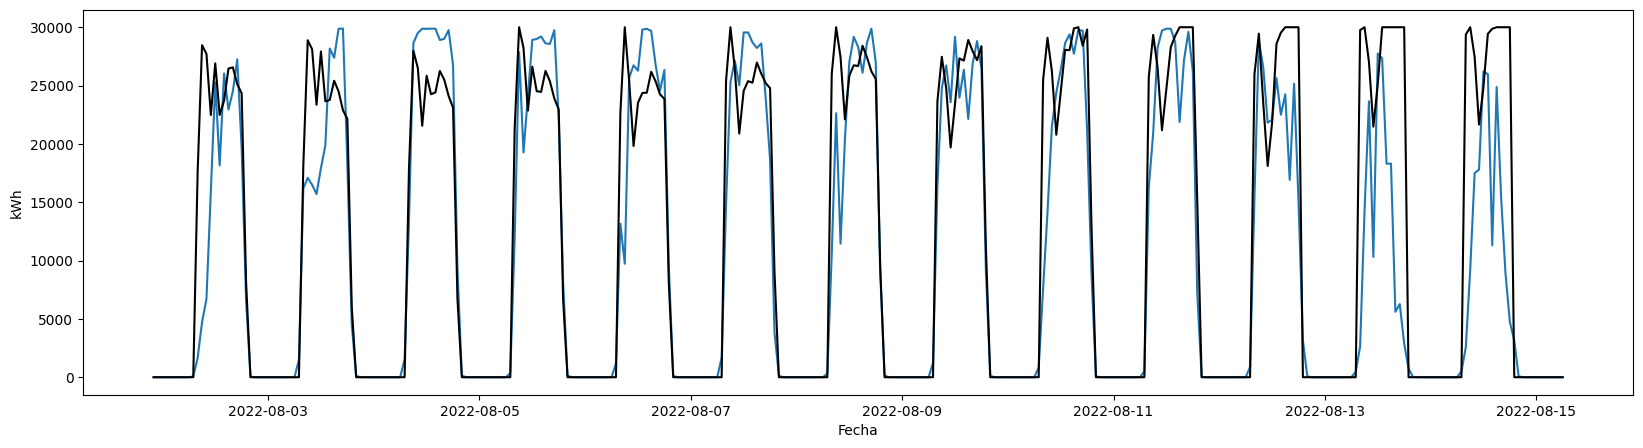

In [1113]:
plt.figure(figsize=(20,5))
fin = inicio_test + 320
plt.plot(datosGeneracion.loc[inicio_test:fin, "Fecha"], datosGeneracion.loc[inicio_test:fin, "Generacion"])
plt.plot(datosGeneracion.loc[inicio_test:fin, "Fecha"], datosGeneracion.loc[inicio_test:fin, "Prediction_UV"], c = 'black')
plt.ylabel('kWh')
plt.xlabel('Fecha')

In [1119]:
#metodos = pd.DataFrame()
#metodos['Generacion'] = datosGeneracion['Generacion']
#metodos['BR'] = datosGeneracion['Prediction_UV']
#metodos['Residual_BR'] = abs(datosGeneracion['Generacion'] - datosGeneracion['Prediction_UV'])


In [1129]:
mae(datosGeneracion.loc[inicio_test:fin_test, ['Generacion']], datosGeneracion.loc[inicio_test:fin_test, ['Prediction_UV']])

4093.736792039328

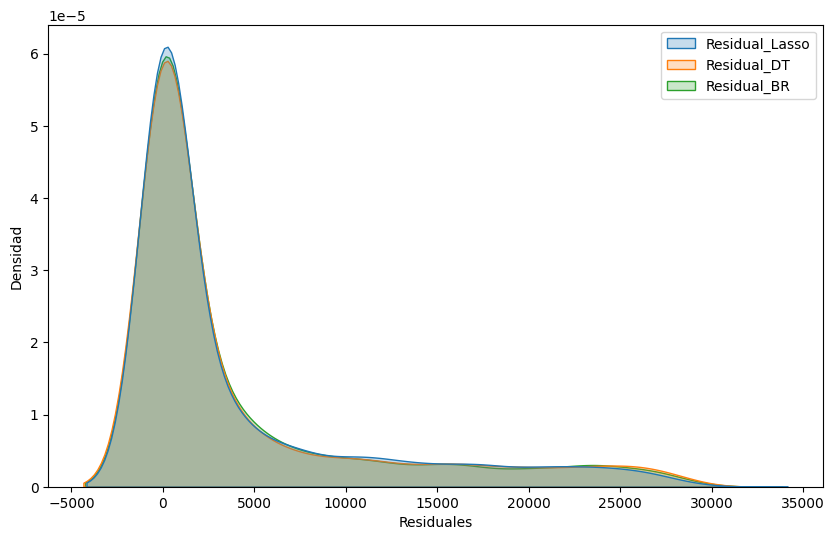

In [1125]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=metodos.loc[inicio_test:fin_test,['Residual_Lasso', 'Residual_DT', 'Residual_BR']], fill=True)
plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.show()

In [1130]:
metricas = pd.DataFrame()
metricas.loc[0, 'Método'] = "Lasso"
metricas.loc[0, 'MAE'] = mae(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['Lasso']])
metricas.loc[0, 'MAPE'] = mape(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['Lasso']])
metricas.loc[0, 'RMSE'] = np.sqrt(mse(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['Lasso']]))
metricas.loc[0, 'R2'] = r2(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['Lasso']])

metricas.loc[1, 'Método'] = "Decision Tree"
metricas.loc[1, 'MAE'] = mae(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['DT']])
metricas.loc[1, 'MAPE'] = mape(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['DT']])
metricas.loc[1, 'RMSE'] = np.sqrt(mse(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['DT']]))
metricas.loc[1, 'R2'] = r2(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['DT']])

metricas.loc[2, 'Método'] = "Bayesian Ridge"
metricas.loc[2, 'MAE'] = mae(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['BR']])
metricas.loc[2, 'MAPE'] = mape(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['BR']])
metricas.loc[2, 'RMSE'] = np.sqrt(mse(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['BR']]))
metricas.loc[2, 'R2'] = r2(metodos.loc[inicio_test:fin_test,['Generacion']], metodos.loc[inicio_test:fin_test,['BR']])


In [1132]:
metricas.to_latex(index=False)

'\\begin{tabular}{lrrrr}\n\\toprule\nMétodo & MAE & MAPE & RMSE & R2 \\\\\n\\midrule\nLasso & 4045.031443 & 2.816051 & 8062.458485 & 0.497956 \\\\\nDecision Tree & 4176.508018 & 2.515355 & 8375.231830 & 0.458248 \\\\\nBayesian Ridge & 4093.736792 & 2.750923 & 8206.588294 & 0.479846 \\\\\n\\bottomrule\n\\end{tabular}\n'

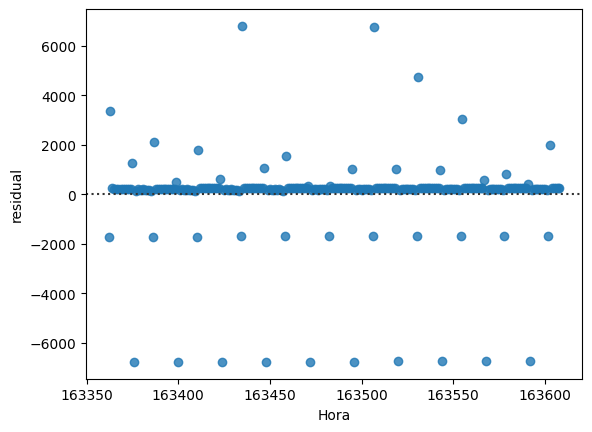

In [1118]:
import seaborn as sns

datosGeneracion["residual"] = datosGeneracion["Generacion"] - datosGeneracion["Prediction_UV"]

sns.residplot(x='Hora', y='residual', data=datosGeneracion[18700:])
plt.show() 